In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,38442,38443,Has anyone tried to harness the energy from li...,Can we store the energy from lightining?,1
1,1,130040,130041,Is there any statistics that can prove that ho...,Why are summer holidays important to you?,0
2,2,497108,497109,Which is the fastest supercomputer in the world?,Which is the fastest supercomputer in India?,0
3,3,42322,42323,How do I make $500k as a CPA?,How much money can I make with a CPA?,0
4,4,26031,29112,Why doesn't Apple launch a dual SIM iPhone?,Would you like a dual sim Iphone? Why doesn't ...,1


In [5]:
df.shape

(242574, 6)

In [6]:
new_df = df.sample(30000,random_state=2)

In [7]:
new_df.shape

(30000, 6)

In [8]:

new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [9]:
new_df=new_df.dropna()

In [10]:
new_df.duplicated().sum()

0

is_duplicate
0    18962
1    11037
Name: count, dtype: int64
is_duplicate
0    63.208774
1    36.791226
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

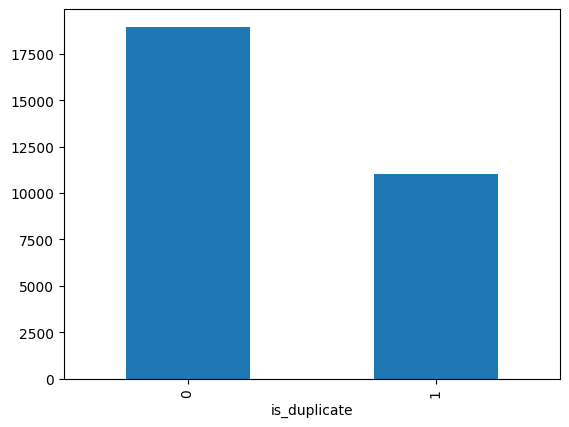

In [11]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55353
Number of questions getting repeated 3434


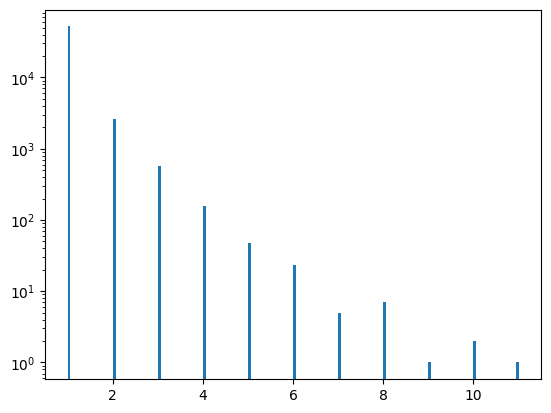

In [13]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [14]:
new_df['question1']=new_df['question1'].str.lower()
new_df['question2']=new_df['question2'].str.lower()

In [15]:
from nltk.corpus import stopwords
word=stopwords.words('english')
def remove_stopwords(text):
    new=[]
    for ch in text.split():
        if ch in word:
            new.append("")
        else:
            new.append(ch)
    x=new[:]
    new.clear()
    return " ".join(x)

In [16]:
new_df['question1']=new_df['question1'].apply(remove_stopwords)
new_df['question2']=new_df['question2'].apply(remove_stopwords)

In [16]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\praty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\praty\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\praty\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def stem_words(text):
    return " ".join([lemmatizer.lemmatize(i) for i in text.split()])
new_df['question1']=new_df['question1'].apply(stem_words)

In [18]:
new_df['question2']=new_df['question2'].apply(stem_words)

In [19]:

# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [20]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
127540,127540,472705,490440,block pingdom google chrome?,way block ad google chrome mobile application?,0,28,46,4,7
39931,39931,107224,426386,italian expression 'bona sera' mean?,"expression ""be heavy with"" mean?",0,36,32,5,5
93268,93268,81451,81703,religion islam happy uniform civil code india?,major change expected india uniform civil code...,1,46,58,7,9
160928,160928,531424,531425,split end slow hair growth?,braiding hair folding end upside speed hair gr...,0,27,51,5,8
199887,199887,12191,30647,way earning money online?,could make money online?,1,25,24,4,4


In [21]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [22]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
127540,127540,472705,490440,block pingdom google chrome?,way block ad google chrome mobile application?,0,28,46,4,7,2
39931,39931,107224,426386,italian expression 'bona sera' mean?,"expression ""be heavy with"" mean?",0,36,32,5,5,2
93268,93268,81451,81703,religion islam happy uniform civil code india?,major change expected india uniform civil code...,1,46,58,7,9,3
160928,160928,531424,531425,split end slow hair growth?,braiding hair folding end upside speed hair gr...,0,27,51,5,8,3
199887,199887,12191,30647,way earning money online?,could make money online?,1,25,24,4,4,2


In [23]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [24]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
127540,127540,472705,490440,block pingdom google chrome?,way block ad google chrome mobile application?,0,28,46,4,7,2,11
39931,39931,107224,426386,italian expression 'bona sera' mean?,"expression ""be heavy with"" mean?",0,36,32,5,5,2,10
93268,93268,81451,81703,religion islam happy uniform civil code india?,major change expected india uniform civil code...,1,46,58,7,9,3,16
160928,160928,531424,531425,split end slow hair growth?,braiding hair folding end upside speed hair gr...,0,27,51,5,8,3,12
199887,199887,12191,30647,way earning money online?,could make money online?,1,25,24,4,4,2,8


In [25]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
127540,127540,472705,490440,block pingdom google chrome?,way block ad google chrome mobile application?,0,28,46,4,7,2,11,0.18
39931,39931,107224,426386,italian expression 'bona sera' mean?,"expression ""be heavy with"" mean?",0,36,32,5,5,2,10,0.20
93268,93268,81451,81703,religion islam happy uniform civil code india?,major change expected india uniform civil code...,1,46,58,7,9,3,16,0.19
160928,160928,531424,531425,split end slow hair growth?,braiding hair folding end upside speed hair gr...,0,27,51,5,8,3,12,0.25
199887,199887,12191,30647,way earning money online?,could make money online?,1,25,24,4,4,2,8,0.25


In [27]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [28]:

token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [29]:
import distance

def fetch_length_features(row):
    q1 = str(row['question1'])
    q2 = str(row['question2'])

    length_features = [0.0] * 3

    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    strs = list(distance.lcsubstrings(q1, q2))
    if strs:  # Check if list is not empty
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0

    return length_features

    

In [30]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [31]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [32]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

minimum characters 0
maximum characters 239
average num of characters 38


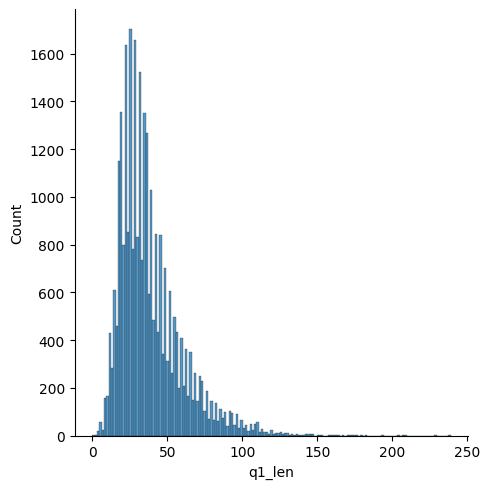

In [26]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 0
maximum characters 356
average num of characters 36


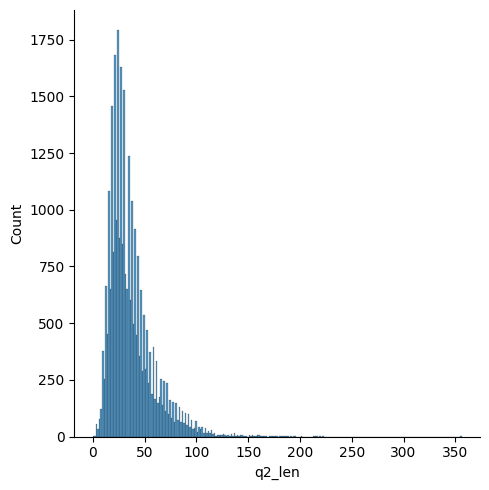

In [65]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 35
average num of words 5


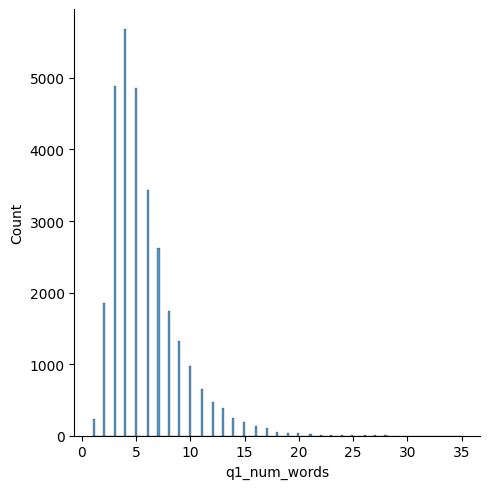

In [66]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 54
average num of words 5


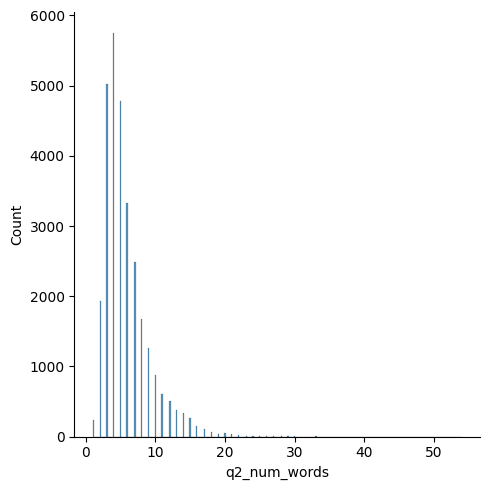

In [67]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

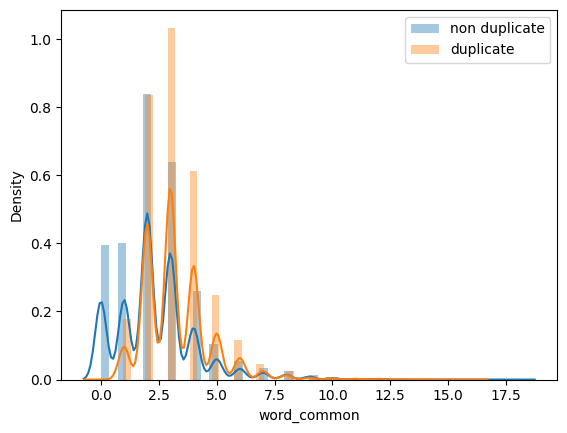

In [68]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

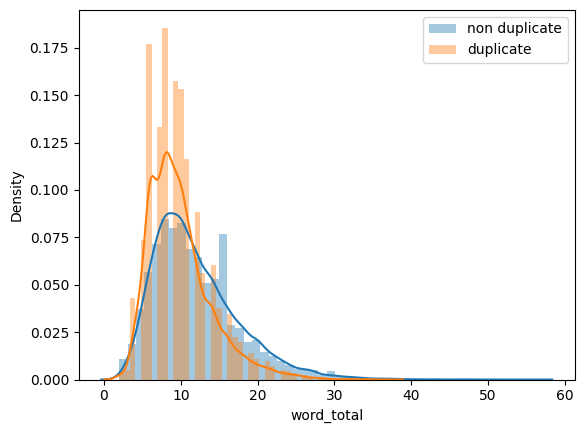

In [69]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

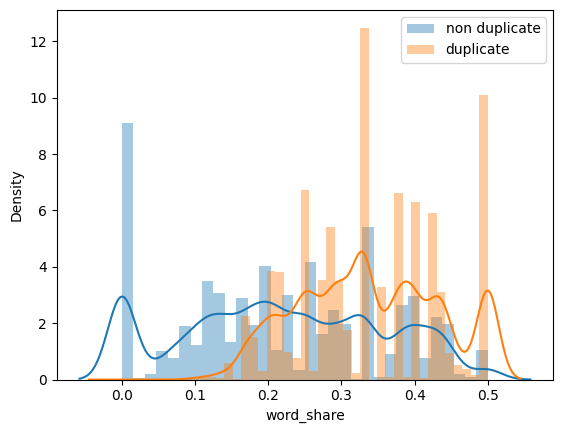

In [70]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [33]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
127540,block pingdom google chrome?,way block ad google chrome mobile application?
39931,italian expression 'bona sera' mean?,"expression ""be heavy with"" mean?"
93268,religion islam happy uniform civil code india?,major change expected india uniform civil code...
160928,split end slow hair growth?,braiding hair folding end upside speed hair gr...
199887,way earning money online?,could make money online?


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [35]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(29999, 6000)

In [36]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(29999, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
127540,0,28,46,4,7,2,11,0.18,0.499988,0.285710,...,0.285710,0.0,0.0,3.0,5.5,0.482759,58,75,58,83
39931,0,36,32,5,5,2,10,0.20,0.399992,0.399992,...,0.399992,1.0,0.0,0.0,5.0,0.333333,64,67,65,68
93268,1,46,58,7,9,3,16,0.19,0.428565,0.333330,...,0.333330,0.0,0.0,2.0,8.0,0.425532,53,61,57,70
160928,0,27,51,5,8,3,12,0.25,0.599988,0.428565,...,0.374995,1.0,0.0,3.0,6.5,0.464286,53,63,53,73
199887,1,25,24,4,4,2,8,0.25,0.499988,0.499988,...,0.499988,1.0,0.0,0.0,4.0,0.560000,64,67,60,69


In [38]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(29999, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
127540,0,28,46,4,7,2,11,0.18,0.499988,0.285710,...,0,0,0,0,0,0,0,0,0,0
39931,0,36,32,5,5,2,10,0.20,0.399992,0.399992,...,0,0,0,0,0,0,0,0,0,0
93268,1,46,58,7,9,3,16,0.19,0.428565,0.333330,...,0,0,0,0,0,0,0,0,0,0
160928,0,27,51,5,8,3,12,0.25,0.599988,0.428565,...,0,0,0,0,0,0,0,0,0,0
199887,1,25,24,4,4,2,8,0.25,0.499988,0.499988,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X=final_df.iloc[:,1:].values
y=final_df.iloc[:,0].values

In [124]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7951666666666667

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.798

In [ ]:

# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import StandardScaler
import pandas as pd

columns_to_scale = [
    'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
    'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq',
    'abs_len_diff', 'mean_len', 'token_set_ratio', 'token_sort_ratio',
    'fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio'
]

scaler = StandardScaler()
scaled_array = scaler.fit_transform(new_df[columns_to_scale])
new_df = pd.DataFrame(scaled_array, columns=columns_to_scale, index=new_df.index)


In [ ]:
new_df['cwc_min']

In [86]:
new_df.shape

(29999, 15)